In [1]:
import ampal
import isambard
import isambard.specifications as specs
import isambard.modelling as modelling
import isambard.optimisation.evo_optimizers as ev_opts
from isambard.optimisation.evo_optimizers import Parameter
import budeff

import matplotlib.pyplot as plt
import numpy as np
import itertools
from pprint import pprint
import nglview as nv
from contextlib import redirect_stdout

%matplotlib inline

In [2]:
def show_ball_and_stick(ampal):
    view = nv.show_text(ampal.pdb)
    view.add_ball_and_stick()
    view.remove_cartoon()
    return view

In [3]:
REGISTER_ADJUST = {
    'a': 0,
    'b': 102.8,
    'c': 205.6,
    'd': 308.4,
    'e': 51.4,
    'f': 154.2,
    'g': 257
}

In [4]:
specification = specs.CoiledCoil.from_parameters

In [5]:
sequences = ['GQLEQELAALDQQIAALKQRRAALKWQIQG', 'GQIQWKLAARRQKLAAIQQDLAALEQELQG']

In [6]:
parameters = [
    Parameter.static('Oligomeric State', 2),
    Parameter.static('Helix Length', 30),
    Parameter.dynamic('Radius', 5.0, 1.0),
    Parameter.dynamic('Pitch', 200, 60),
    Parameter.dynamic('PhiCA', REGISTER_ADJUST['c'], 27),  
]

In [7]:
default_values = [x.default_value for x in parameters]
print(default_values)

[2, 30, 5.0, 200, 205.6]


In [8]:
def get_bude_total_energy(ampal_object):
    return budeff.get_internal_energy(ampal_object).total_energy

### Genetic Algorithm

In [9]:
opt_ga = ev_opts.GA(specification, sequences, parameters, get_bude_total_energy)

In [10]:
opt_ga.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	69   	-888.829	25.0058	-949.984	-849.324
1  	61   	-912.783	16.4349	-949.984	-883.375
2  	53   	-926.751	7.65912	-949.984	-911.697
3  	75   	-932.87 	5.30215	-949.984	-925.634
4  	71   	-936.368	5.84664	-956.64 	-930.202
5  	75   	-939.784	6.68975	-956.64 	-932.367
6  	57   	-944.132	6.57371	-957.123	-934.384
7  	76   	-948.402	4.26199	-957.123	-938.043
8  	66   	-950.688	1.68729	-957.123	-946.489
9  	74   	-951.217	1.742  	-957.123	-948.771
10 	75   	-952.147	2.01731	-957.123	-949.984
11 	77   	-953.235	2.14954	-957.123	-950.549
12 	73   	-954.615	1.87093	-957.539	-951.004
13 	83   	-956.028	0.604502	-957.539	-954.846
14 	68   	-956.427	0.444568	-957.64 	-955.545
15 	77   	-956.705	0.324701	-957.64 	-956.068
16 	74   	-956.925	0.283517	-957.64 	-956.549
17 	79   	-957.08 	0.280896	-957.64 	-956.64 
18 	67   	-957.194	0.235314	-957.64 	-956.699
19 	83   	-957.273	0.22228 	-957.653	-956.793
20 	67   	-957.323	0.211062	-957.725	-956.802
21

In [11]:
optimized_model_ga = opt_ga.best_model

In [12]:
budeff.get_internal_energy(optimized_model_ga).total_energy

-957.7252181426506

In [13]:
funnel_data_ga = opt_ga.make_energy_funnel_data()

In [14]:
xs = [x[0] for x in funnel_data_ga]
ys = [x[1] for x in funnel_data_ga]
zs = [x[2] for x in funnel_data_ga]

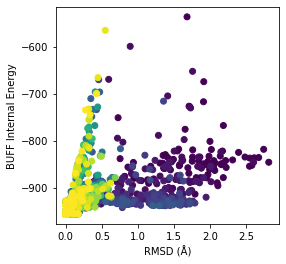

In [15]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('ga.png')

In [16]:
f = open('apCC-Di-optimized-model-ga.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_ga.pdb)

### Differential Evolution

In [17]:
opt_de = ev_opts.DE(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [18]:
opt_de.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max    
0  	100  	-862.772	28.1542	-939.164	-782.81
1  	100  	-876.309	28.796 	-939.164	-826.56
2  	100  	-888.031	28.0575	-939.164	-834.857
3  	100  	-901.045	24.6174	-945.778	-855.762
4  	100  	-909.202	22.8894	-945.778	-855.762
5  	100  	-918.258	18.6644	-945.778	-863.536
6  	100  	-925.185	14.6187	-945.778	-869.891
7  	100  	-929.766	10.3186	-945.778	-886.384
8  	100  	-932.526	6.61689	-945.778	-900.99 
9  	100  	-934.717	4.65695	-945.778	-903.311
10 	100  	-936.146	3.08741	-950.535	-929.248
11 	100  	-937.272	2.81758	-950.535	-929.82 
12 	100  	-938.559	3.0686 	-950.535	-932.078
13 	100  	-939.566	2.91761	-950.535	-933.965
14 	100  	-940.526	3.02393	-950.535	-936.273
15 	100  	-941.128	3.05177	-950.535	-936.465
16 	100  	-941.782	3.09273	-950.598	-936.465
17 	100  	-942.644	3.25533	-951.872	-937.8  
18 	100  	-943.568	3.71319	-952.541	-937.955
19 	100  	-944.846	3.92109	-952.541	-937.955
20 	100  	-945.902	3.76329	-952.541	-939.005
21 	100  	-94

In [19]:
optimized_model_de = opt_de.best_model
budeff.get_internal_energy(optimized_model_de).total_energy

-953.0497134537089

In [20]:
funnel_data_de = opt_de.make_energy_funnel_data()

In [21]:
xs = [x[0] for x in funnel_data_de]
ys = [x[1] for x in funnel_data_de]
zs = [x[2] for x in funnel_data_de]

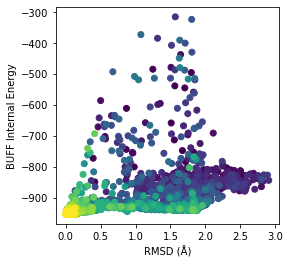

In [22]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('de.png')

In [23]:
f = open('apCC-Di-optimized-model-de.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_de.pdb)

### Particle Swarm Optimisation

In [24]:
opt_pso = ev_opts.PSO(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [25]:
opt_pso.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	100  	-831.388	112.588	-935.251	-167.957
1  	89   	-770.623	198.5  	-934.653	97.8771 
2  	67   	-813.364	178.825	-938.448	97.8771 
3  	66   	-829.828	149.869	-943.357	97.8771 
4  	69   	-834.623	127.483	-943.357	97.8771 
5  	86   	-852.604	76.5946	-936.644	-532.55 
6  	93   	-782.18 	119.969	-928.099	-311.636
7  	83   	-810.001	146.303	-934.804	-304.877
8  	69   	-844.309	108.489	-934.759	-304.877
9  	72   	-837.759	109.879	-933.464	-323.486
10 	82   	-806.246	107.107	-940.818	-535.727
11 	79   	-829.98 	144.206	-941.595	111.621 
12 	83   	-865.193	110.896	-941.595	111.621 
13 	92   	-864.822	58.3367	-933.08 	-538.842
14 	85   	-765.8  	155.57 	-931.465	-255.064
15 	81   	-732.48 	170.822	-932.163	-221.776
16 	83   	-827.897	144.01 	-936.346	-221.776
17 	93   	-845.452	64.6198	-935.486	-367.594
18 	98   	-740.774	154.356	-925.187	-189.007
19 	85   	-686.28 	224.127	-935.745	33.0798 
20 	57   	-746.158	212.358	-938.869	33.0798 
21 	64   	

In [26]:
optimized_model_pso = opt_pso.best_model
budeff.get_internal_energy(optimized_model_pso).total_energy

-943.3570599920383

In [27]:
funnel_data_pso = opt_pso.make_energy_funnel_data()

In [28]:
xs = [x[0] for x in funnel_data_pso]
ys = [x[1] for x in funnel_data_pso]
zs = [x[2] for x in funnel_data_pso]

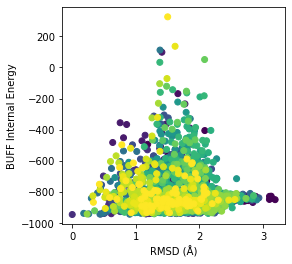

In [29]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('pso.png')

In [30]:
f = open('apCC-Di-optimized-model-pso.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_pso.pdb)

### Covariance Matrix Adaptive Evolutionary Strategy

In [31]:
opt_cmaes = ev_opts.CMAES(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [32]:
opt_cmaes.run_opt(100, 30, cores=8)

gen	evals	avg    	std    	min     	max     
0  	100  	-849.77	40.7494	-904.229	-663.571
1  	100  	-821.253	88.1388	-931.975	-514.307
2  	100  	-834.953	113.778	-938.736	-321.131
3  	100  	-884.191	66.3803	-939.625	-459.013
4  	100  	-927.278	8.6674 	-943.976	-879.693
5  	100  	-930.243	9.3462 	-943.233	-870.087
6  	100  	-933.765	4.64178	-944.996	-908.212
7  	100  	-935.305	3.28017	-942.707	-925.89 
8  	100  	-934.872	4.33918	-942.741	-917.173
9  	100  	-935.726	3.99225	-939.91 	-920.699
10 	100  	-937.398	2.61967	-941.111	-922.472
11 	100  	-938.307	2.133  	-939.924	-925.599
12 	100  	-939.03 	1.46984	-940    	-934.282
13 	100  	-939.73 	0.695176	-940.014	-934.884
14 	100  	-939.42 	1.42497 	-940.037	-934.81 
15 	100  	-939.847	0.494076	-940.084	-934.969
16 	100  	-939.9  	0.0568661	-940.038	-939.764
17 	100  	-939.909	0.0587826	-940.062	-939.78 
18 	100  	-939.908	0.0627555	-940.063	-939.748
19 	100  	-939.924	0.0532698	-940.089	-939.808
20 	100  	-939.933	0.0443155	-940.028	-939.826

In [33]:
optimized_model_cmaes = opt_cmaes.best_model
budeff.get_internal_energy(optimized_model_cmaes).total_energy

-944.9958024827204

In [34]:
funnel_data_cmaes = opt_cmaes.make_energy_funnel_data()

In [35]:
xs = [x[0] for x in funnel_data_cmaes]
ys = [x[1] for x in funnel_data_cmaes]
zs = [x[2] for x in funnel_data_cmaes]

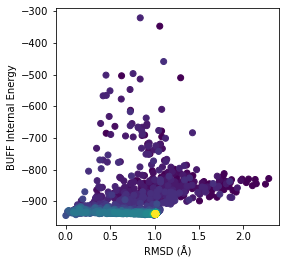

In [36]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('cmaes.png')

In [37]:
f = open('apCC-Di-optimized-model-cmaes.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_cmaes.pdb)